In [5]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [6]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [7]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [12]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [13]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)

In [14]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [15]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [16]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [17]:
# Find the most recent date in the data set.
latest_date = session.query(func.max(Measurement.date)).all()


In [20]:
print(f'The most recent date in the data set is {latest_date[0][0]}')

The most recent date in the data set is 2017-08-23


In [23]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
latest_date_back1y = dt.date(2017,8,23) - dt.timedelta(366)

# Perform a query to retrieve the data and precipitation scores
data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > (latest_date_back1y)).all()

In [33]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(data=data, columns=["Date", "Precipitation"]).sort_index(0).dropna()
df

C:\Users\tinph\AppData\Local\Temp\ipykernel_31896\2473256499.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only.
  df = pd.DataFrame(data=data, columns=["Date", "Precipitation"]).sort_index(0).dropna()


,Date,Precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2223,2017-08-17,0.13
2225,2017-08-19,0.09
2227,2017-08-21,0.56
2228,2017-08-22,0.50


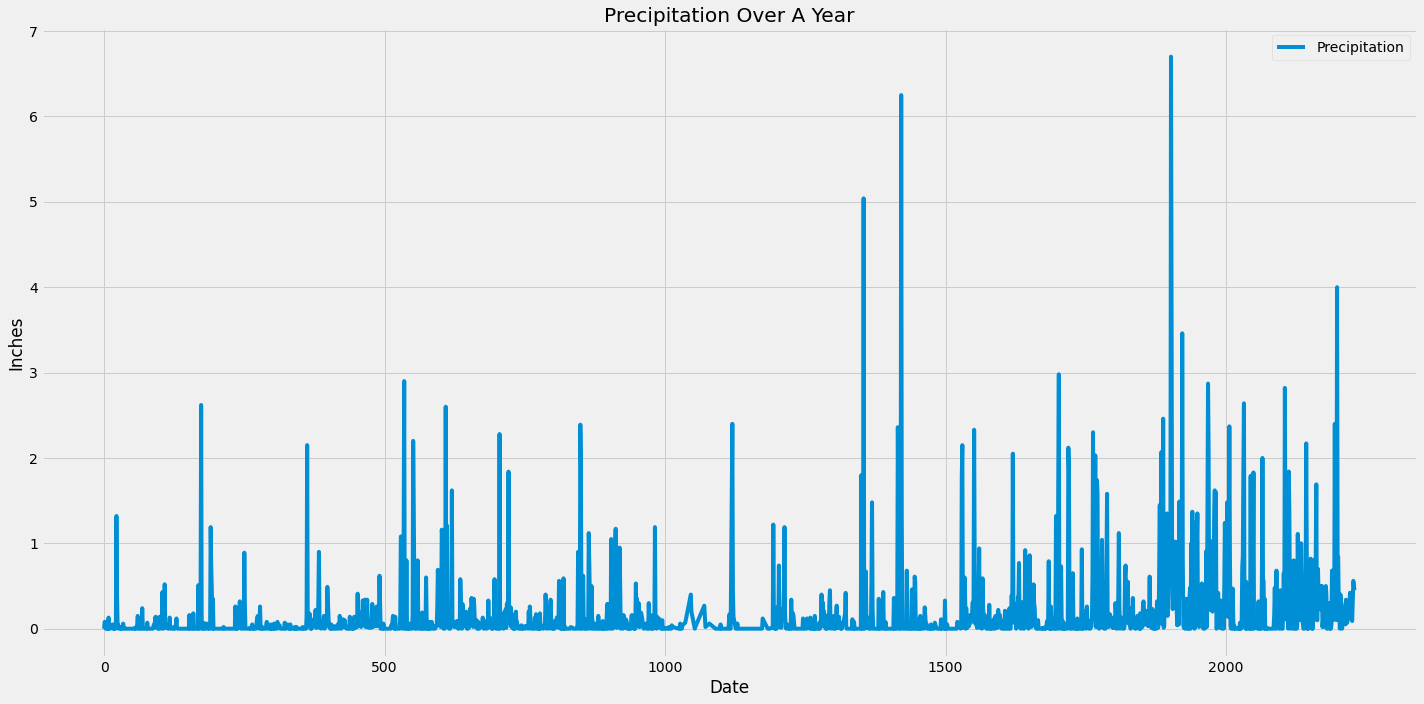

In [30]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot.line(figsize = (20, 10))
plt.xlabel("Date")
plt.ylabel("Inches")
plt.title("Precipitation Over A Year")
plt.tight_layout()

In [31]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [34]:
# Design a query to calculate the total number stations in the dataset
station_list = session.query(Measurement.station)
print(f'The total number stations in the dataset is {station_list.count()}')

The total number stations in the dataset is 19550


In [40]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
from sqlalchemy import func, desc
active_station_list = session.query(Measurement.station, func.count(Measurement.station).label('times')).group_by(Measurement.station).order_by(desc('times'))
print(active_station_list)
print("--------------------------")
for i in active_station_list:
    print(i)

SELECT measurement.station AS measurement_station, count(measurement.station) AS times 
FROM measurement GROUP BY measurement.station ORDER BY times DESC
--------------------------
('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [42]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == active_station_list[0][0]).scalar()
print("Min temp: ", lowest_temp)

highest_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == active_station_list[0][0]).scalar()
print("Max temp: ", highest_temp)

avg_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == active_station_list[0][0]).scalar()
print("Avg temp: ", avg_temp)

Min temp:  54.0
Max temp:  85.0
Avg temp:  71.66378066378067


In [48]:
session.query(Measurement.date, Measurement.tobs).filter(Measurement.date > latest_date_back1y, Measurement.station == active_station_list[0][0]).all()

[('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-

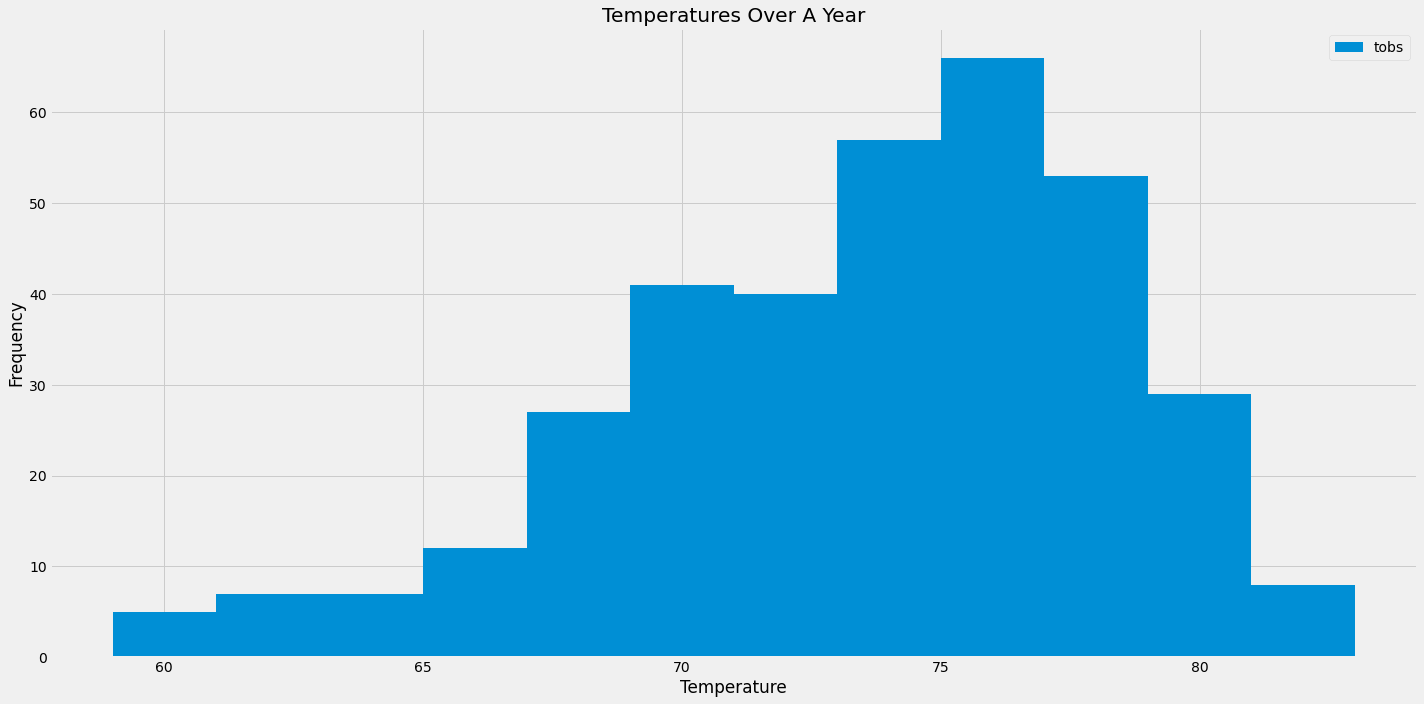

In [49]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_df = pd.DataFrame(session.query(Measurement.date, Measurement.tobs).filter(Measurement.date > latest_date_back1y, Measurement.station == active_station_list[0][0]).all())

temp_df.plot.hist(bins = 12, figsize = (20, 10))
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Temperatures Over A Year")
plt.tight_layout()

# Close session

In [50]:
# Close Session
session.close()